In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.tree import plot_tree

# Function to find the best split in the dataset
def find_best_split(X):
    # Initialize an array for storing entropy values
    Entropy = np.zeros(X.shape)
    # Iterate over each feature column
    for j in range(X.shape[1]):
        # Iterate over each data point
        for i in range(X.shape[0]):
            # Find values on the left side of the split
            left_vals = X[:,j][X[:,j] <= X[i,j]]
            # Calculate the entropy for the left side if there are values
            if len(left_vals)>0:
                Entropy[i,j] += np.mean((left_vals - np.mean(left_vals))**2)
            # Find values on the right side of the split
            right_vals = X[:,j][X[:,j] > X[i,j]]
            # Calculate the entropy for the right side if there are values
            if len(right_vals)>0:
                Entropy[i,j] += np.mean((right_vals - np.mean(right_vals))**2)
            print(f"Entropy of feature {j} at threshold {X[i,j]}: {Entropy[i,j]}")
    # Find the indices of the minimum entropy value
    i, j = np.unravel_index(np.argmin(Entropy), Entropy.shape)
    print(f"Best split: Feature {j} at threshold {X[i,j]}")
    return i, j



|--- feature_0 <= 5.50
|   |--- feature_0 <= 2.50
|   |   |--- value: [1.50]
|   |--- feature_0 >  2.50
|   |   |--- value: [4.00]
|--- feature_0 >  5.50
|   |--- feature_0 <= 7.50
|   |   |--- value: [6.50]
|   |--- feature_0 >  7.50
|   |   |--- value: [9.00]



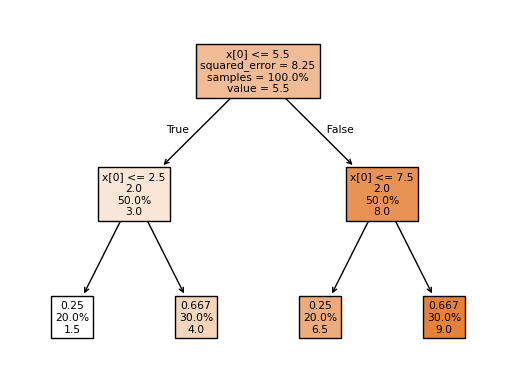

In [3]:
# Create the dataset
X = np.linspace(1,10,num=10).reshape(-1,1)
# We use the same dataset for both X and y, as an example. We expect the tree to split the data into two equal halves.
y = X.copy()
__DEPTH__ = 2

# Decision Tree Regressor
dtree = DecisionTreeRegressor(max_depth=__DEPTH__)
dtree.fit(X, y)

# Print out the tree structure, thresholds, and leaves
tree_rules = export_text(dtree)
print(tree_rules)

# Plot the decision tree
plot_tree(dtree, filled=True, node_ids=False, proportion=True, label='root') 
plt.show()


In [4]:

# Initialize arrays for storing thresholds, splitters, and indices for each node in the tree
tree_thresholds = np.zeros((__DEPTH__+1,2**__DEPTH__))
tree_splitters = np.zeros((__DEPTH__+1,2**__DEPTH__), dtype=int)
tree_inds = np.zeros((__DEPTH__+1,2**__DEPTH__, len(y)), dtype=int)

# Set the depth and node variables
depth = 0
node = 0

# Find the best split at the current depth and node
i, j = find_best_split(X)


Entropy of feature 0 at threshold 1.0: 6.666666666666667
Entropy of feature 0 at threshold 2.0: 5.5
Entropy of feature 0 at threshold 3.0: 4.666666666666667
Entropy of feature 0 at threshold 4.0: 4.166666666666666
Entropy of feature 0 at threshold 5.0: 4.0
Entropy of feature 0 at threshold 6.0: 4.166666666666666
Entropy of feature 0 at threshold 7.0: 4.666666666666667
Entropy of feature 0 at threshold 8.0: 5.5
Entropy of feature 0 at threshold 9.0: 6.666666666666667
Entropy of feature 0 at threshold 10.0: 8.25
Best split: Feature 0 at threshold 5.0


In [5]:
print(type(i),type(j))

<class 'numpy.int64'> <class 'numpy.int64'>


In [6]:

# Store the node indices, threshold, and splitter
tree_inds[depth,node,:] = 1
tree_thresholds[depth,node] = X[i,j]
tree_splitters[depth,node] = j

# Increase the depth by 1
depth = 1

# Set the node variable to 0
node = 0

# Get the splitter from the previous depth and node
j = tree_splitters[depth-1,node]

# Split the dataset based on the threshold value from the previous depth
inds_left = X[:,j] <= tree_thresholds[depth-1,0]
inds_right = X[:,j] > tree_thresholds[depth-1,0]

# Find the best split for the left side of the split
print("Left side")
i, j = find_best_split(X[inds_left,:])
# Store the threshold and node indices for the left side
tree_thresholds[depth,0] = X[inds_left,:][i,j]
tree_inds[depth,0,inds_left] = 1

# Find the best split for the right side of the split
print("Right side")
i, j = find_best_split(X[inds_right,:])
# Store the threshold and node indices for the right side
tree_thresholds[depth,1] = X[inds_right,:][i,j]

Left side
Entropy of feature 0 at threshold 1.0: 1.25
Entropy of feature 0 at threshold 2.0: 0.9166666666666666
Entropy of feature 0 at threshold 3.0: 0.9166666666666666
Entropy of feature 0 at threshold 4.0: 1.25
Entropy of feature 0 at threshold 5.0: 2.0
Best split: Feature 0 at threshold 2.0
Right side
Entropy of feature 0 at threshold 6.0: 1.25
Entropy of feature 0 at threshold 7.0: 0.9166666666666666
Entropy of feature 0 at threshold 8.0: 0.9166666666666666
Entropy of feature 0 at threshold 9.0: 1.25
Entropy of feature 0 at threshold 10.0: 2.0
Best split: Feature 0 at threshold 7.0
